Implement an algorithm that can determine the "feature importance" for both linear classifiers and decision trees

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train_new.csv", index_col=0)
test = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test_new.csv", index_col=0)

In [ ]:
train0 = train[train["is_claim"] == 0].sample(1000, random_state=42)
train1 = train[train["is_claim"] == 1].sample(500, random_state=42)
train_new = pd.concat([train0, train1], ignore_index=False)
train_new = train_new.sample(frac=1, random_state=42, ignore_index=False)

In [ ]:
x_train = train_new.drop(["is_claim"], axis="columns")
y_train = train_new["is_claim"]

In [ ]:
def split(x, y, test_size=0.2):
    i = int((1 - test_size) * x.shape[0])
    o = np.random.permutation(x.shape[0])

    x_train, x_test = np.split(np.take(x,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_valid, y_train, y_valid = split(x_train, y_train, test_size=0.2)

In [ ]:
x_train_new = x_train.values
x_valid_new = x_valid.values
y_train_new = y_train.values
y_valid_new = y_valid.values

In [ ]:
import matplotlib.pyplot as plt
import random

Linear Classifier

In [ ]:
def initialize_weights_and_bias(num_of_feature):
    W = np.full((1, num_of_feature),0.01)
    b = 0.0
    return W,b

def sigmoid(z):
  z = z.astype(float)
  y_head = 1 / (1+np.exp(-z))
  return y_head

def square_loss(y_pred, target):
  return np.mean(pow((y_pred-target),2))

In [ ]:
def forward_backward_propagation(W, b, x_train, y_train):
    y = np.dot(W, x_train.T) + b
    y_head = sigmoid(y)
    loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
    cost = (np.sum(loss)) / (-x_train.shape[0])

    #Backward Propogation
    derivative_weight = (np.dot((y_head-y_train),(x_train)))/x_train.shape[0]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [ ]:
def train(W, b, x_train, y_train, learning_rate, num_of_iterarion):
    cost_list = []
    index = []
    for i in range(num_of_iterarion):
        cost, gradients = forward_backward_propagation(W, b, x_train, y_train)
        cost_list.append(cost)
        index.append(i)
        W = W - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"Weight": W,"Bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(W, b, x_test):
    y = sigmoid(np.dot(W, x_test.T)+b)
    y_pred = np.zeros((1, x_test.shape[0]))

    for i in range(y.shape[0]):
        if y[0,i]< 0.5:
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1

    return y_pred

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    dimension = x_train.shape[0]
    num_of_feature =  x_train.shape[1]

    W,b = initialize_weights_and_bias(num_of_feature)

    parameters, gradients, cost_list = train(W, b, x_train, y_train, learning_rate, num_iterations)

    y_pred_test = predict(parameters["Weight"], parameters["Bias"], x_test)

    accuracy = 0
    for i in range(y_test.shape[0]):
      if y_test[i] == y_pred_test[0][i]:
        accuracy = accuracy + 1
    accuracy = (accuracy/y_test.shape[0])*100

    print("Test Accuracy = ",accuracy, "%")
    return accuracy ,gradients

<ipython-input-11-1bb6c32eb50e>:4: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
<ipython-input-11-1bb6c32eb50e>:4: RuntimeWarning: invalid value encountered in multiply
  loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
<ipython-input-10-5e602181ccdd>:8: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1+np.exp(-z))


Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


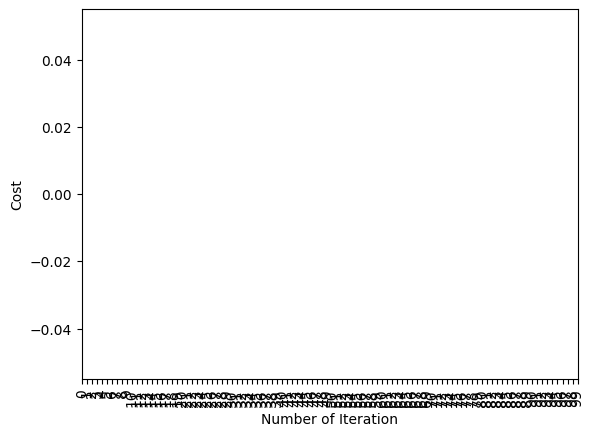

Test Accuracy =  64.66666666666666 %


In [ ]:
# Train logistic regression model
accuracy, gradient = logistic_regression(x_train_new, y_train_new, x_valid_new, y_valid_new,learning_rate = 0.001, num_iterations = 100)


In [ ]:
# Print the learned coefficients (weights)
print("Learned coefficients:", gradient["derivative_weight"][0])

# Get the indices of the top k features with non-zero coefficients
k = 5
top_feature_indices = np.argsort(np.abs(gradient["derivative_weight"][0][1:]))[::-1][:k]

# Print the indices of the top k features
print("Top", k, "feature indices:", top_feature_indices)

# Print the corresponding feature names
feature_names = x_train.columns
top_features = [feature_names[i] for i in top_feature_indices]
print("Top", k, "features:", top_features)

Learned coefficients: [-2.43442240e-01 -2.07833333e-02 -1.57772436e-01 -5.67485250e+03
 -5.82500000e-01 -1.04833333e+00 -1.09166667e-01 -2.11666667e-01
 -8.25000000e-02 -3.22500000e-01 -1.25833333e-01 -8.25000000e-02
 -3.87143333e+02 -1.20500000e+00 -1.15000000e-01 -1.72416667e+00
 -1.59412500e+00 -1.26926833e+03 -5.51027500e+02 -5.11196667e+02
 -4.59040000e+02 -1.98333333e-01 -1.00000000e-01 -1.00000000e-01
 -1.20000000e-01 -1.87500000e-01 -2.40833333e-01 -2.40833333e-01
 -3.20000000e-01 -1.98333333e-01 -1.21666667e-01 -2.40833333e-01
 -3.28333333e-01 -5.90833333e-01 -8.33333333e-03 -1.08333333e-02
 -6.66666667e-03 -3.33333333e-03 -1.83333333e-02 -2.75000000e-02
 -3.33333333e-03 -8.33333333e-04 -8.33333333e-04 -1.66666667e-03
 -9.16666667e-03 -4.66666667e-02  0.00000000e+00 -1.66666667e-03
 -4.16666667e-03 -3.41666667e-02 -6.66666667e-03 -3.91666667e-02
 -8.33333333e-04 -6.66666667e-03 -8.66666667e-02 -1.08333333e-02
 -8.50000000e-02 -2.33333333e-02 -1.09166667e-01 -2.00000000e-02
 -8

Decision Tree

In [ ]:
import math

def unique_vals(rows, col):
    return set([row[col] for row in rows])


def class_counts(rows):
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


def max_label(dict):
    max_count = 0
    label = ""

    for key, value in dict.items():
        if dict[key] > max_count:
            max_count = dict[key]
            label = key

    return label


def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)


class Question:
    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))


def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def entropy(rows):
    entries = class_counts(rows)
    avg_entropy = 0
    size = float(len(rows))
    for label in entries:
        prob = entries[label] / size
        avg_entropy = avg_entropy + (prob * math.log(prob, 2))
    return -1*avg_entropy


def information_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def find_best_split(rows, header):
    best_gain = 0
    best_question = None
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1

    for col in range(n_features):
        values = set([row[col] for row in rows])
        for val in values:
            question = Question(col, val, header)
            true_rows, false_rows = partition(rows, question)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            gain = information_gain(true_rows, false_rows, current_uncertainty)
            if gain > best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


class Leaf:
    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth
        self.rows = rows


class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch,
                 depth,
                 id,
                 rows):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth
        self.id = id
        self.rows = rows


def build_tree(rows, header, depth=0, id=0):
    gain, question = find_best_split(rows, header)

    if gain == 0:
        return Leaf(rows, id, depth)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows, header, depth + 1, 2 * id + 2)

    false_branch = build_tree(false_rows, header, depth + 1, 2 * id + 1)

    return Decision_Node(question, true_branch, false_branch, depth, id, rows)


def prune_tree(node, prunedList):
    if isinstance(node, Leaf):
        return node
    if int(node.id) in prunedList:
        return Leaf(node.rows, node.id, node.depth)

    node.true_branch = prune_tree(node.true_branch, prunedList)

    node.false_branch = prune_tree(node.false_branch, prunedList)

    return node


def classify(row, node):
    if isinstance(node, Leaf):
        return node.predicted_label
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

## TODO: Step 4
def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print(spacing + "Leaf id: " + str(node.id) + " Predictions: " + str(node.predictions) + " Label Class: " + str(node.predicted_label))
        return

    print(spacing + str(node.question) + " id: " + str(node.id) + " depth: " + str(node.depth))

    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


def getLeafNodes(node, leafNodes =[]):
    if isinstance(node, Leaf):
        leafNodes.append(node)
        return

    getLeafNodes(node.true_branch, leafNodes)

    getLeafNodes(node.false_branch, leafNodes)

    return leafNodes


def getInnerNodes(node, innerNodes =[]):
    if isinstance(node, Leaf):
        return

    innerNodes.append(node)

    getInnerNodes(node.true_branch, innerNodes)

    getInnerNodes(node.false_branch, innerNodes)

    return innerNodes


def computeAccuracy(rows, node):
    count = len(rows)
    if count == 0:
        return 0

    accuracy = 0
    for row in rows:
        if row[-1] == classify(row, node):
            accuracy += 1
    return round(accuracy/count, 2)

In [ ]:
def df_split(df, test_size=0.2):
    i = int((1 - test_size) * len(df))
    o = np.random.permutation(len(df))

    x_train, x_test = np.split(np.take(df, o, axis=0), [i])
    return x_train, x_test

In [ ]:
header = list(train_new.columns)
lst = train_new.values.tolist()

# splitting the data set into train and valid
train_df, valid_df = df_split(lst, test_size=0.2)

In [ ]:
import math

class TreeBuilder:
    def __init__(self):
        self.feature_importance = {}

    def build_tree(self, rows, header, depth=0, id=0):
        gain, question = find_best_split(rows, header)

        if gain == 0:
            return Leaf(rows, id, depth)

        true_rows, false_rows = partition(rows, question)

        true_branch = self.build_tree(true_rows, header, depth + 1, 2 * id + 2)
        false_branch = self.build_tree(false_rows, header, depth + 1, 2 * id + 1)

        # Update feature importance based on the current question
        if question.column not in self.feature_importance:
            self.feature_importance[question.column] = 1
        else:
            self.feature_importance[question.column] += 1

        return Decision_Node(question, true_branch, false_branch, depth, id, rows)

In [ ]:
# Build a decision tree
tree_builder = TreeBuilder()
tree = tree_builder.build_tree(train_df, header)

# Print the decision tree
print("Decision Tree:")
print_tree(tree)

# Print feature importance
print("Feature Importance:")
for feature, importance in tree_builder.feature_importance.items():
    print(f"Feature {header[feature]}: {importance}")

Decision Tree:
Is policy_tenure >= 0.614907122273298? id: 0 depth: 0
--> True:
  Is age_of_car >= 0.15? id: 2 depth: 1
  --> True:
    Is area_cluster_C2 >= 1.0? id: 6 depth: 2
    --> True:
      Is is_day_night_rear_view_mirror >= 1.0? id: 14 depth: 3
      --> True:
        Leaf id: 30 Predictions: {0.0: 2} Label Class: 0.0
      --> False:
        Leaf id: 29 Predictions: {1.0: 5} Label Class: 1.0
    --> False:
      Is width >= 1745.0? id: 13 depth: 3
      --> True:
        Is area_cluster_C8 >= 1.0? id: 28 depth: 4
        --> True:
          Is make >= 4.0? id: 58 depth: 5
          --> True:
            Leaf id: 118 Predictions: {1.0: 2} Label Class: 1.0
          --> False:
            Is age_of_car >= 0.19? id: 117 depth: 6
            --> True:
              Leaf id: 236 Predictions: {0.0: 4} Label Class: 0.0
            --> False:
              Is age_of_policyholder >= 0.403846153846154? id: 235 depth: 7
              --> True:
                Is age_of_policyholder >= 0

In [ ]:
class TreeBuilder:
    def __init__(self):
        self.feature_importance = {}

    def build_tree(self, rows, header, depth=0, id=0):
        gain, question = find_best_split(rows, header)

        if gain == 0:
            return Leaf(rows, id, depth)

        true_rows, false_rows = partition(rows, question)

        true_branch = self.build_tree(true_rows, header, depth + 1, 2 * id + 2)
        false_branch = self.build_tree(false_rows, header, depth + 1, 2 * id + 1)

        # Update feature importance based on the current question
        if question.column not in self.feature_importance:
            self.feature_importance[question.column] = 1
        else:
            self.feature_importance[question.column] += 1

        return Decision_Node(question, true_branch, false_branch, depth, id, rows)

# Build a decision tree
tree_builder = TreeBuilder()
tree = tree_builder.build_tree(train_df, header)

# Select and print the top five most important features
top_features = sorted(tree_builder.feature_importance.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Five Most Important Features:")
for feature, importance in top_features:
    print(f"Feature {header[feature]}: {importance}")


Top Five Most Important Features:
Feature policy_tenure: 130
Feature age_of_policyholder: 66
Feature age_of_car: 44
Feature population_density: 22
Feature height: 6
